<a href="https://colab.research.google.com/github/tobiasbkraemer/Mandatory-Assignment-1---AI/blob/main/cars_mandatory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Problem:

### Forudsigelse af bilens brændstofforbrug (mpg):

In [ ]:
# Importer nødvendige biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Indlæs datasættet
data = pd.read_csv('cars.csv')

# 2. Konverter '?' til NaN og fjern manglende værdier
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data_cleaned = data.dropna()

# 3. Fjern irrelevante kolonner
data_cleaned = data_cleaned.drop(columns=['car name'])

# 4. Normaliser vægt og acceleration
scaler = StandardScaler()
data_cleaned[['weight', 'acceleration']] = scaler.fit_transform(data_cleaned[['weight', 'acceleration']])


In [ ]:
# 5. Opret nye features
data_cleaned['power_to_weight'] = data_cleaned['horsepower'] / data_cleaned['weight']
data_cleaned['displacement_to_cylinder'] = data_cleaned['displacement'] / data_cleaned['cylinders']
data_cleaned['efficiency_score'] = (data_cleaned['horsepower'] * data_cleaned['weight']) / data_cleaned['acceleration']

# 6. Definér features og target
X = data_cleaned[['displacement', 'weight', 'cylinders', 'horsepower', 'acceleration',
                  'power_to_weight', 'displacement_to_cylinder', 'efficiency_score']]
y = data_cleaned['mpg']

In [ ]:
# 7. Split data i træning (70%), test (15%) og validering (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Træningssæt:", X_train.shape, y_train.shape)
print("Test sæt:", X_test.shape, y_test.shape)
print("Validerings sæt:", X_val.shape, y_val.shape)


# 8. Opret model og kør GridSearchCV for at optimere parametre
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search til at finde den bedste kombination af hyperparametre
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)

# Træn modellen
grid_search.fit(X_train, y_train)

# Hent den bedste model fra GridSearchCV
best_model = grid_search.best_estimator_

Træningssæt: (274, 8) (274,)
Test sæt: (59, 8) (59,)
Validerings sæt: (59, 8) (59,)


In [ ]:
# 9. Forudsig resultater på testdata
y_pred = best_model.predict(X_test)

# Evaluering på testdata
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print("\nTest-sættets præstation:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

# Forudsig resultater på valideringsdata
y_val_pred = best_model.predict(X_val)

# Evaluering på valideringsdata
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("\nValideringssættets præstation:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R² Score: {r2_val:.2f}")


# 10. Evaluer modellen
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModellens præstation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Test-sættets præstation:
Mean Absolute Error (MAE): 2.92
Root Mean Squared Error (RMSE): 4.10
R² Score: 0.70

Valideringssættets præstation:
Mean Absolute Error (MAE): 3.34
Root Mean Squared Error (RMSE): 4.38
R² Score: 0.61

Modellens præstation:
Mean Absolute Error (MAE): 2.92
Root Mean Squared Error (RMSE): 4.10
R² Score: 0.70


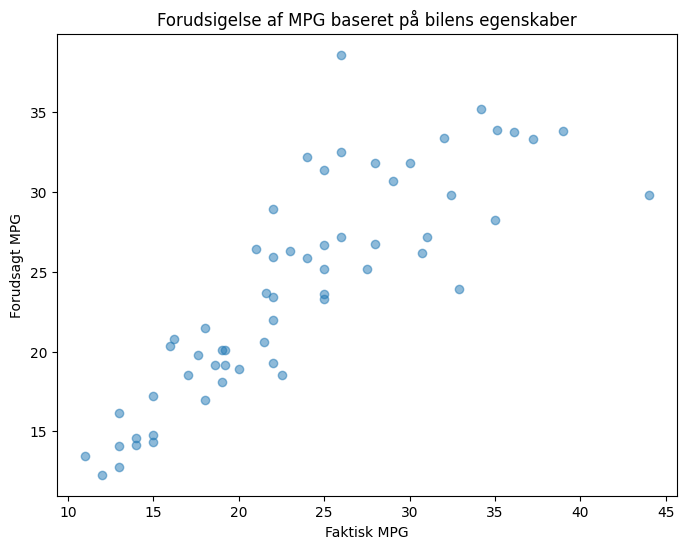

In [ ]:
# 11. Visualiser resultater
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Faktisk MPG")
plt.ylabel("Forudsagt MPG")
plt.title("Forudsigelse af MPG baseret på bilens egenskaber")
plt.show()

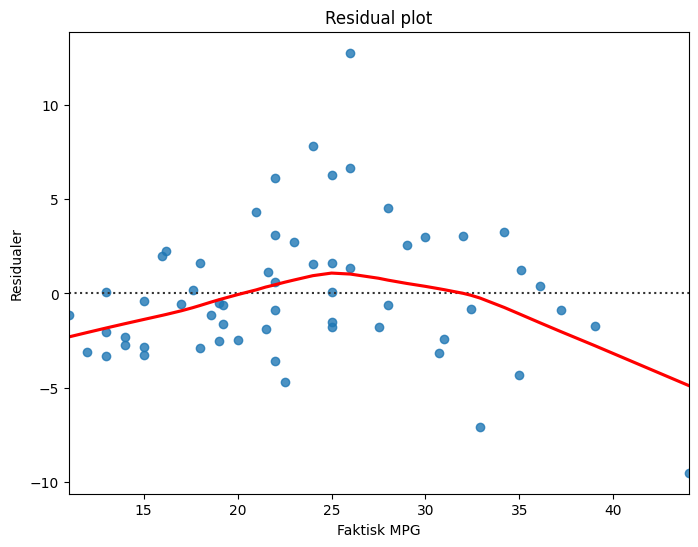

In [ ]:
# 12. Residual plot (for at vurdere systematiske fejl)
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.title("Residual plot")
plt.xlabel("Faktisk MPG")
plt.ylabel("Residualer")
plt.show()

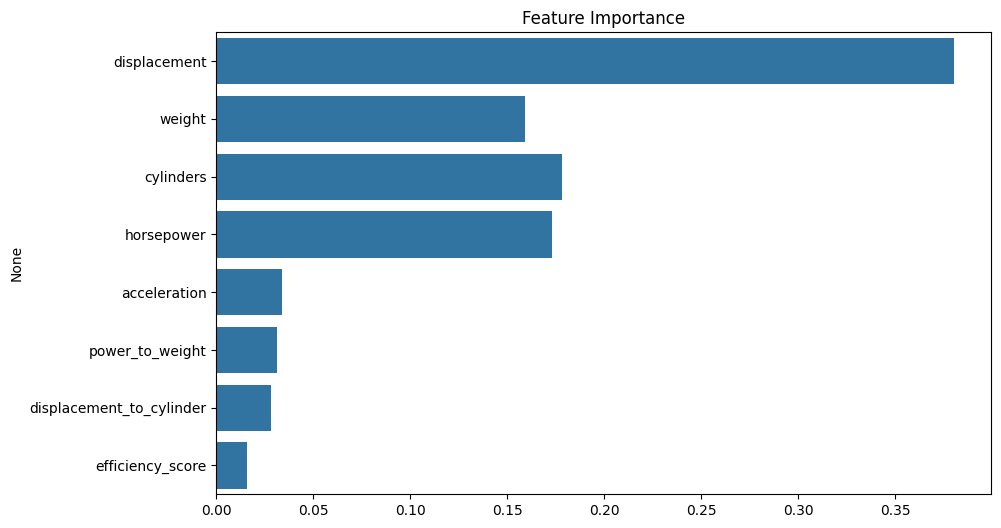

In [ ]:
# 13. Feature Importance plot
importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

# Logistic Regression Problem:
### Forudsigelse af bilens oprindelse baseret på dens tekniske egenskaber

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definer X (features) og y (target)
X = data_cleaned.drop(columns=['origin'])  # Features
y = data_cleaned['origin']  # Target (1 = USA, 2 = Europa, 3 = Asien)

# 2. Skaler alle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split data i træning (70%), test (15%) og validering (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 4. GridSearchCV til optimering
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(multi_class='ovr', random_state=42),
                           param_grid, cv=5, n_jobs=-1)


# 5. Træn GridSearchCV
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [ ]:
# 6. Evaluering
# Bedste model
best_model = grid_search.best_estimator_
print(f"Bedste parametre: {grid_search.best_params_}")

# Evaluer på træningssæt
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluer på valideringssæt
val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Evaluer på testsæt
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Bedste parametre: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 0.80
Validation Accuracy: 0.71
Test Accuracy: 0.78



Confusion Matrix on the Test Set:
[[30  2  4]
 [ 1  8  3]
 [ 2  1  8]]


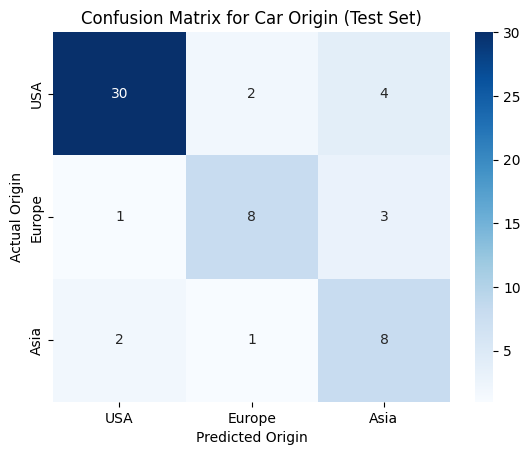


Classification Report on the Test Set:
              precision    recall  f1-score   support

         USA       0.91      0.83      0.87        36
      Europe       0.73      0.67      0.70        12
        Asia       0.53      0.73      0.62        11

    accuracy                           0.78        59
   macro avg       0.72      0.74      0.73        59
weighted avg       0.80      0.78      0.79        59



In [ ]:
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix on the Test Set:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['USA', 'Europe', 'Asia'],
            yticklabels=['USA', 'Europe', 'Asia'])
plt.title('Confusion Matrix for Car Origin (Test Set)')
plt.xlabel('Predicted Origin')
plt.ylabel('Actual Origin')
plt.show()

# 8. Classification Report
print("\nClassification Report on the Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['USA', 'Europe', 'Asia']))